1.SRC & Data Load

In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
# src to path
sys.path.append(os.path.abspath('../'))
from src.features import engineer_payroll_features
from src.models import get_models
# Load data
df = pd.read_csv('../data/payroll_data_3500.csv')
print(f"Dataset Loaded: {df.shape}")

Dataset Loaded: (3500, 11)


2.Feature Engineering

In [3]:
# modular logic
df_engineered = engineer_payroll_features(df)

# Display
print("Engineered Features for Risk Scoring:")
df_engineered[['attendance_instability', 'unplanned_leave_rate', 'salary_risk_index']].head()

Engineered Features for Risk Scoring:


,attendance_instability,unplanned_leave_rate,salary_risk_index
0,0.312500,0.000000,0.0146
1,0.339751,1.333333,-0.6019
2,0.204499,0.111111,0.6564
3,0.277008,0.333333,-0.5139
4,0.458716,0.500000,-0.1008


3.Model Comparison

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
# 1. Features and Target
X = df_engineered.drop(['Employee_ID', 'Is_High_Risk'], axis=1)
y = df_engineered['Is_High_Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# 2. Train and Evaluate
models = get_models()
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Precision": round(precision_score(y_test, preds), 4),
        "Recall": round(recall_score(y_test, preds), 4),
        "F1-Score": round(f1_score(y_test, preds), 4)
    })
# 3. Model Comparison Table
comparison_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\n--- Model Comparison Table ---")
display(comparison_df)


/Users/manikandan/Desktop/ZENVY_Payroll_Risk/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Model Comparison Table ---


/Users/manikandan/Desktop/ZENVY_Payroll_Risk/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [16:02:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Precision,Recall,F1-Score
2,XGBoost,0.9815,1.0000,0.9907
1,Random Forest,1.0000,0.9811,0.9905
0,Logistic Regression,0.6111,0.4151,0.4944


4.Feature Importance

/var/folders/t7/9rjkfpwx4s92n4wwg5fx4ppw0000gn/T/ipykernel_3344/2529404497.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


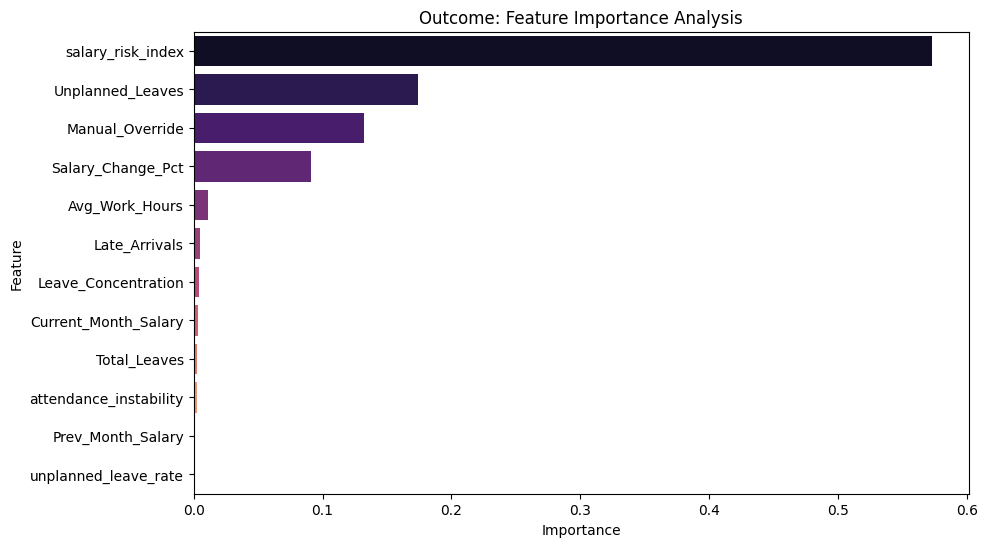

In [8]:
# XGBoost
importances = models["XGBoost"].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title('Outcome: Feature Importance Analysis')
plt.show()

Mathematical Justification for Model Selection :
I have selected XGBoost as the final model for the Payroll Risk Scoring System.